# <font color = 'Metalic'> Loading Libraries</font>

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.preprocessing import Normalizer
import warnings
warnings.simplefilter("ignore") 

In [182]:
df=pd.read_csv("C:/Users/shafi/Downloads/USArrests.csv")

In [183]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [184]:
df.rename(columns={'Unnamed: 0':'County'},inplace=True)

In [185]:
df.head()

,County,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [186]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [187]:
df.isna().sum()

County      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Since we dont have the null values and since when will go for further procedure of clustering, since county is not any label regarding the study our data is still unlabelled so we can study using Unsupervised learning.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   County    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## <font color='Green'> Reducing the table </font>

In [189]:
X=df.iloc[:,1:]
X

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


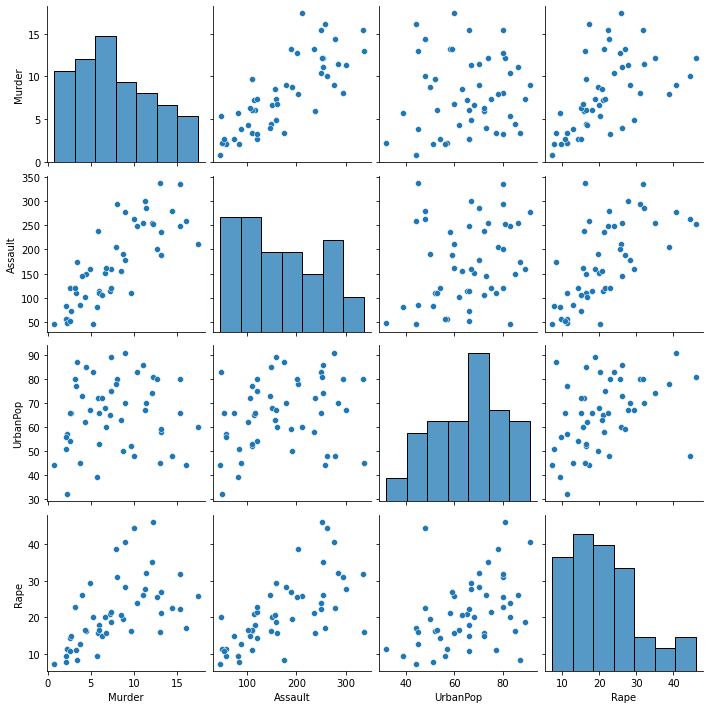

In [190]:
sns.pairplot(X)

In [191]:
cor=X.corr()
cor

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [192]:
norm=Normalizer()
X_norm=norm.fit_transform(X)
X_norm=pd.DataFrame(X_norm)
X_norm.head()

,0,1,2,3
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


# 1. KMeans Clustering

In [193]:
#finding the optimal no of clusters.
k=range(1,10)
WCSS=[]
for i in k:
    model=KMeans(n_clusters=i,init='k-means++',random_state=45).fit(X_norm)
    WCSS.append(model.inertia_)
    print(model.inertia_)

1.9452076233849003
0.7540963759591797
0.3278478050693132
0.22760245765174872
0.16395152491640727
0.12059896172575112
0.09896604010702602
0.08752339251328094
0.076905932247056


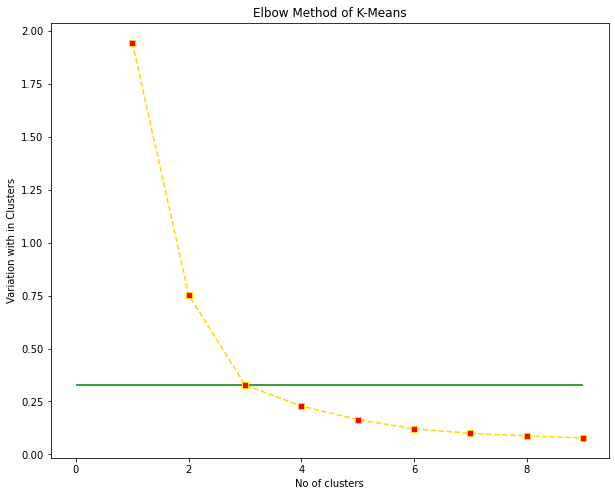

In [194]:
#Creating Elbow plot to determine the optimal cluster.
plt.figure(figsize=(10,8))
plt.plot(k,WCSS,'--s',markerfacecolor='Red',color='gold')
plt.title('Elbow Method of K-Means')
plt.xlabel('No of clusters')
plt.ylabel('Variation with in Clusters')
plt.hlines(0.3278478050693132,0,9,color='green')
plt.show()

In [195]:
#K-Means using optimal value of cluster.
model=KMeans(n_clusters=3,init='k-means++',random_state=45).fit(X_norm)
yk=model.predict(X_norm)
yk

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 1, 0])

In [196]:
result= df.copy()

In [197]:
result["Clusters_kmeans"]=yk

In [198]:
result.head()

,County,Murder,Assault,UrbanPop,Rape,Clusters_kmeans
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


array([[<AxesSubplot:title={'center':'Assault'}, xlabel='[Clusters]'>,
        <AxesSubplot:title={'center':'Murder'}, xlabel='[Clusters]'>],
       [<AxesSubplot:title={'center':'Rape'}, xlabel='[Clusters]'>,
        <AxesSubplot:title={'center':'UrbanPop'}, xlabel='[Clusters]'>]],
      dtype=object)

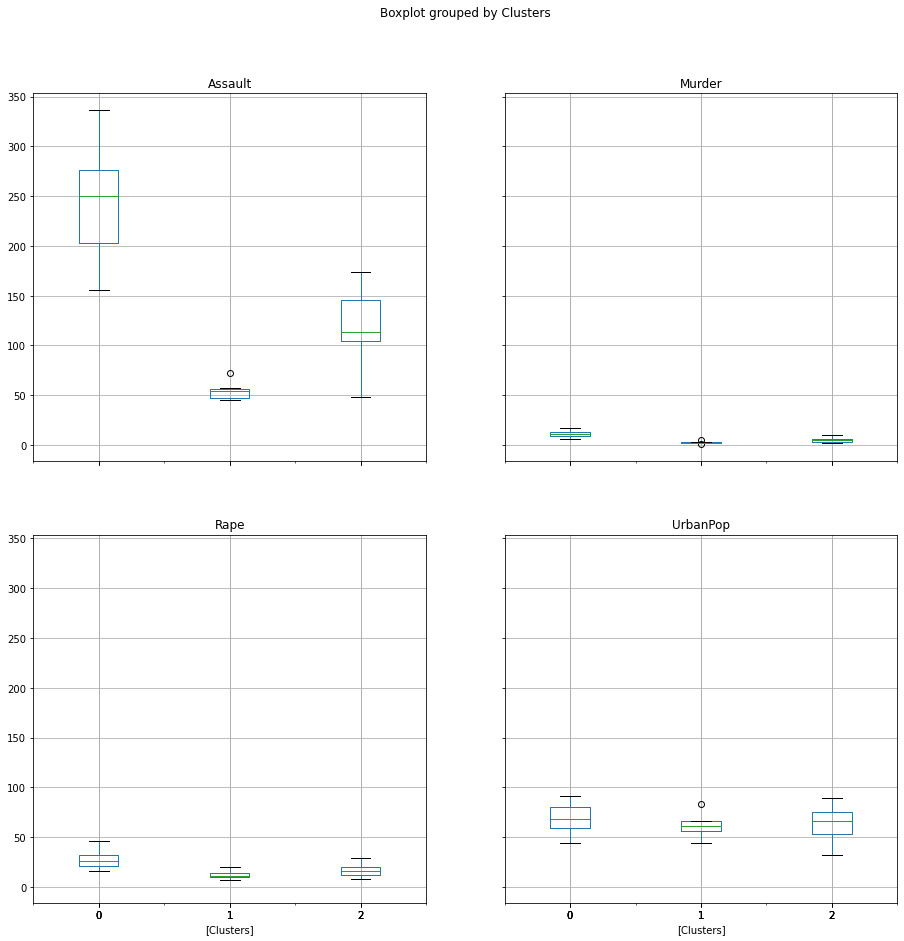

In [199]:
df_k.boxplot(by='Clusters',figsize=(15,15))

In [200]:
df_km=df_k.iloc[:,[0,5]]
df_km.head()

,County,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0


In [201]:
clus_0=df_km.loc[df_km['Clusters']==0]
clus_0

,County,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0
5,Colorado,0
7,Delaware,0
8,Florida,0
9,Georgia,0
12,Illinois,0


In [202]:
clus_1=df_km.loc[df_km['Clusters']==1]
clus_1

,County,Clusters
10,Hawaii,1
14,Iowa,1
22,Minnesota,1
28,New Hampshire,1
33,North Dakota,1
48,Wisconsin,1


In [203]:
clus_2=df_km.loc[df_km['Clusters']==2]
clus_2

,County,Clusters
6,Connecticut,2
11,Idaho,2
13,Indiana,2
15,Kansas,2
16,Kentucky,2
18,Maine,2
20,Massachusetts,2
25,Montana,2
26,Nebraska,2
29,New Jersey,2


__Interpretation__ <br>
Using the clusters and above box plots we can say that the cluster 0 groups are commiting more crimes than the other 2 clusters because we can see that cluster 0 counties has assault crimes are greater than 200 _per 100000_, murder crimes are greater than 10 _per 100000_, rape crimes are greater than 25 _per 100000_ and also has highest urban population.__

<ol><span style='background-color: #CD0000'> <font color='gold'>Cluster 0 = Danger area</font></span> <br>
<span style='background-color: #EE0000'> <font color='gold'>Cluster 2 = Moderate Danger Area</font></span><br>
<span style='background-color: #FF0000'> <font color='gold'>Cluster 1 = Less Danger area</font></span><br></ol>

# 2.HC
Agglomerative Clustering

In [204]:
# using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

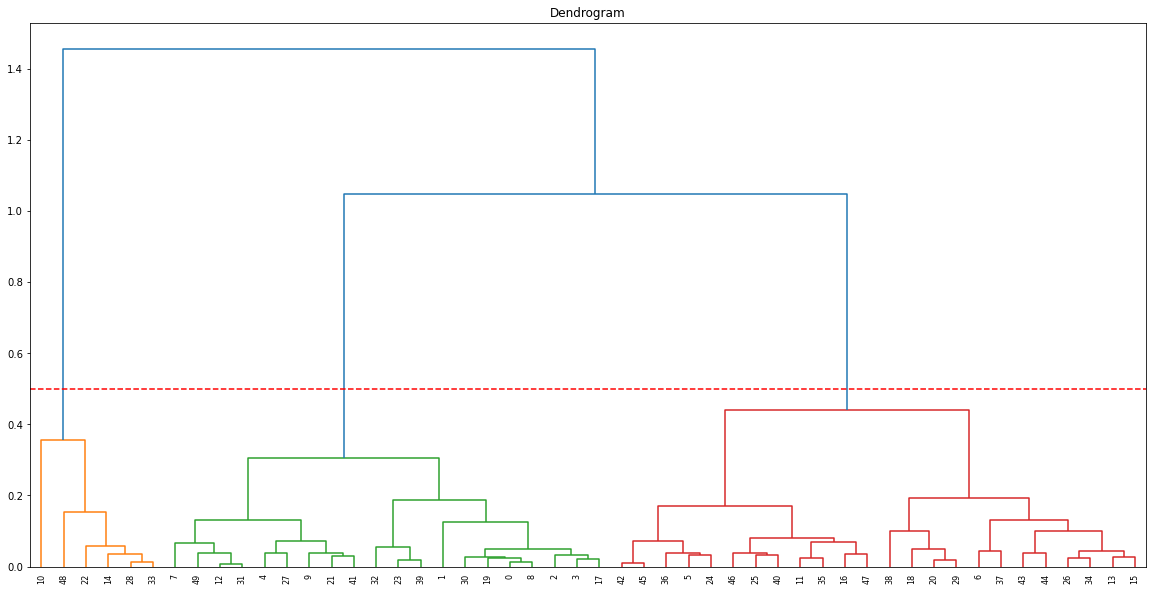

In [205]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram (sch.linkage(X_norm,method = 'ward'))

plt.title('Dendrogram')

plt.hlines(0.5,0,5000,colors ="r",linestyles = "dashed")
plt.show()

In [206]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage ='ward')
clusters_hc=hc.fit_predict(X_norm)

In [207]:
clusters_hc

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [208]:

result["clusters_hc"] = clusters_hc
result.head(3)

,County,Murder,Assault,UrbanPop,Rape,Clusters_kmeans,clusters_hc
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2


# 3. PCA

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(StandardScaler().fit_transform(X_norm) , columns=X_norm.columns , index=X_norm.index)

In [210]:
from sklearn.decomposition import PCA

In [211]:
#Create an instance for dim-reduction
pca=PCA()
#fit the existing normalized DF to instance
pca.fit(scaled_data)

PCA()

In [212]:
pca.n_components

# 4. Explained Variance

In [213]:
##create variable of Explained Var ratio 
EVR=pca.explained_variance_ratio_

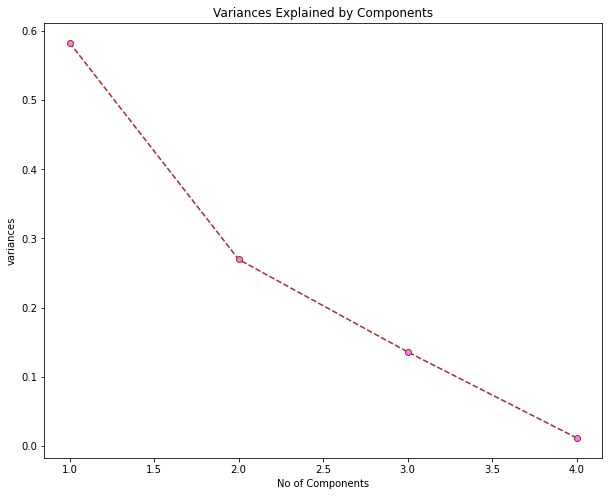

In [214]:
#plot the for optimal no of component is to be reduced.
plt.figure(figsize=(10,8))
plt.plot(range(1,5),EVR,'--o',color='brown',markerfacecolor='violet')
plt.title("Variances Explained by Components")
plt.xlabel("No of Components")
plt.ylabel('variances')
plt.show()

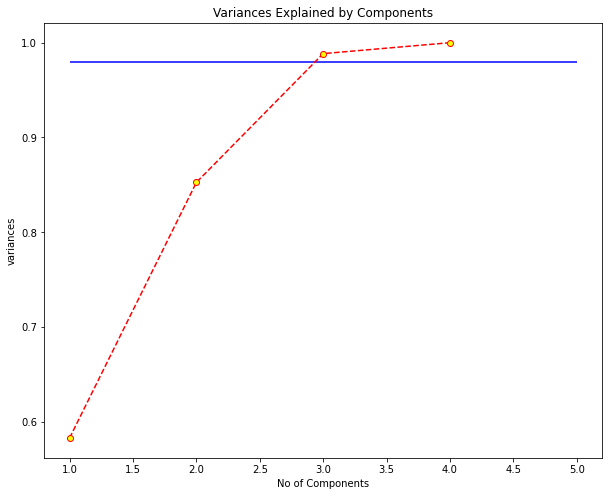

In [215]:
#or plot of cummulative variacne because this is much better.
plt.figure(figsize=(10,8))
plt.plot(range(1,5),EVR.cumsum(),'--o',color='red',markerfacecolor='yellow')
plt.title("Variances Explained by Components")
plt.xlabel("No of Components")
plt.ylabel('variances')
plt.hlines(0.98,1,5,color='blue')
plt.show()

In [216]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
model_pca = pca.transform(scaled_data)

In [217]:
model_pca

array([[-1.75971621, -0.24871159, -0.5243787 ],
       [-0.87185317, -0.60256907,  1.77243889],
       [-1.02021038,  1.03045336,  0.68028871],
       [-1.38447434,  0.08043292,  0.0086106 ],
       [-0.36813424,  0.20578114,  1.123724  ],
       [ 0.24189917, -0.64393019,  1.52915215],
       [ 0.87375614,  1.54452978, -0.69723642],
       [-1.26180842,  1.81208589, -0.05312967],
       [-1.57827344,  0.18324404, -0.06004743],
       [-1.61553275, -2.06468837, -0.90271209],
       [ 4.99150778, -2.09087706, -0.9240451 ],
       [ 0.04710989,  1.34974505,  0.59044362],
       [-1.04439777,  0.50582437, -0.13958436],
       [ 0.69650225, -1.37428143,  0.06443767],
       [ 2.74537038,  0.48386899, -0.29985993],
       [ 0.56076259, -0.44463007, -0.07519976],
       [-0.47501071, -2.33684269, -1.08444401],
       [-1.76464298, -0.52188523, -0.78673671],
       [ 0.50072897,  1.73605716, -0.43797825],
       [-1.55085724,  0.64469578,  0.21622528],
       [ 0.3954402 ,  1.26348979, -0.177

# 5. KMeans with Principal Components

In [218]:
#using the pca model we create K means
k=range(1,10)
WCSS1=[]
for i in k:
    model_new_w_pca=KMeans(n_clusters=i,init='k-means++',random_state=45).fit(model_pca)
    WCSS1.append(model_new_w_pca.inertia_)
    print(model_new_w_pca.inertia_)

197.6938334972999
125.3318694761644
93.85025823464113
71.59963343499165
57.766541153668264
46.44667496957058
37.38020405106437
31.492876077958176
26.34372382792249


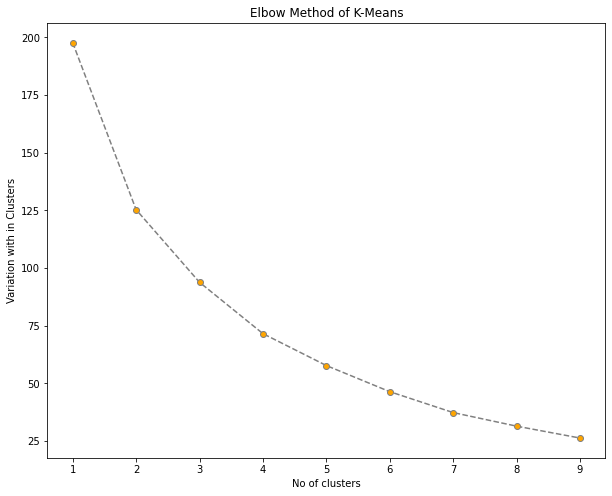

In [219]:
plt.figure(figsize=(10,8))
plt.plot(k,WCSS1,'--o',markerfacecolor='orange',color='grey')
plt.title('Elbow Method of K-Means')
plt.xlabel('No of clusters')
plt.ylabel('Variation with in Clusters')
plt.show()

In [220]:
model_new_w_pca=KMeans(n_clusters=4,init='k-means++',random_state=45)
yk_pca= model_new_w_pca.fit_predict(model_pca)
yk_pca

array([1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 3, 0, 1, 2, 3, 2, 1, 1, 0, 1, 0, 1,
       3, 1, 2, 2, 2, 2, 3, 0, 1, 1, 1, 3, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 3, 1])

In [221]:

result['Clusters_pca_kmeans']=yk_pca
result.head()

,County,Murder,Assault,UrbanPop,Rape,Clusters_kmeans,clusters_hc,Clusters_pca_kmeans
0,Alabama,13.2,236,58,21.2,0,2,1
1,Alaska,10.0,263,48,44.5,0,2,2
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,0,2,1
4,California,9.0,276,91,40.6,0,2,2


array([[<AxesSubplot:title={'center':'Assault'}, xlabel='[Clusters]'>,
        <AxesSubplot:title={'center':'Murder'}, xlabel='[Clusters]'>],
       [<AxesSubplot:title={'center':'Rape'}, xlabel='[Clusters]'>,
        <AxesSubplot:title={'center':'UrbanPop'}, xlabel='[Clusters]'>]],
      dtype=object)

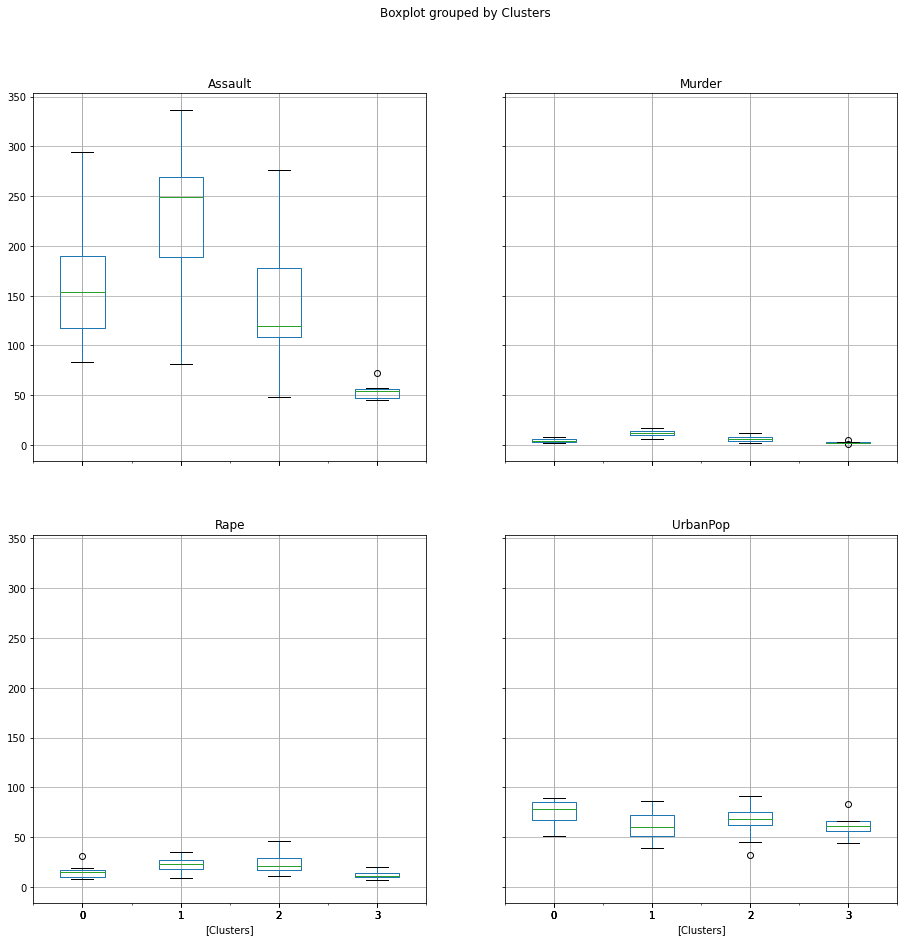

In [222]:
df_k_pca.boxplot(by='Clusters',figsize=(15,15))

In [223]:
df_km_pca=df_k_pca.iloc[:,[0,5]]
df_km_pca.head(2)

,County,Clusters
0,Alabama,1
1,Alaska,2


In [224]:
clus_p0=df_km_pca.loc[df_km_pca['Clusters']==0]
print(clus_p0)
clus_p1=df_km_pca.loc[df_km_pca['Clusters']==1]
print(clus_p1)
clus_p2=df_km_pca.loc[df_km_pca['Clusters']==2]
print(clus_p2)
clus_p3=df_km_pca.loc[df_km_pca['Clusters']==3]
print(clus_p3)

           County  Clusters
2         Arizona         0
6     Connecticut         0
7        Delaware         0
11          Idaho         0
18          Maine         0
20  Massachusetts         0
29     New Jersey         0
38   Rhode Island         0
            County  Clusters
0          Alabama         1
3         Arkansas         1
8          Florida         1
9          Georgia         1
12        Illinois         1
16        Kentucky         1
17       Louisiana         1
19        Maryland         1
21        Michigan         1
23     Mississippi         1
30      New Mexico         1
31        New York         1
32  North Carolina         1
39  South Carolina         1
41       Tennessee         1
42           Texas         1
45        Virginia         1
47   West Virginia         1
49         Wyoming         1
          County  Clusters
1         Alaska         2
4     California         2
5       Colorado         2
13       Indiana         2
15        Kansas         2
24    

In [225]:
df_concat=pd.concat([df.reset_index(drop=True),pd.DataFrame(model_pca)],axis=1)
df_concat.rename(columns={0:'Component1',1:'Component2',2:'Component3'},inplace=True)
df_concat['Clusters']=yk_pca
df_concat.head(11)

,County,Murder,Assault,UrbanPop,Rape,Component1,Component2,Component3,Clusters
0,Alabama,13.2,236,58,21.2,-1.759716,-0.248712,-0.524379,1
1,Alaska,10.0,263,48,44.5,-0.871853,-0.602569,1.772439,2
2,Arizona,8.1,294,80,31.0,-1.020210,1.030453,0.680289,0
3,Arkansas,8.8,190,50,19.5,-1.384474,0.080433,0.008611,1
4,California,9.0,276,91,40.6,-0.368134,0.205781,1.123724,2
5,Colorado,7.9,204,78,38.7,0.241899,-0.643930,1.529152,2
6,Connecticut,3.3,110,77,11.1,0.873756,1.544530,-0.697236,0
7,Delaware,5.9,238,72,15.8,-1.261808,1.812086,-0.053130,0
8,Florida,15.4,335,80,31.9,-1.578273,0.183244,-0.060047,1
9,Georgia,17.4,211,60,25.8,-1.615533,-2.064688,-0.902712,1


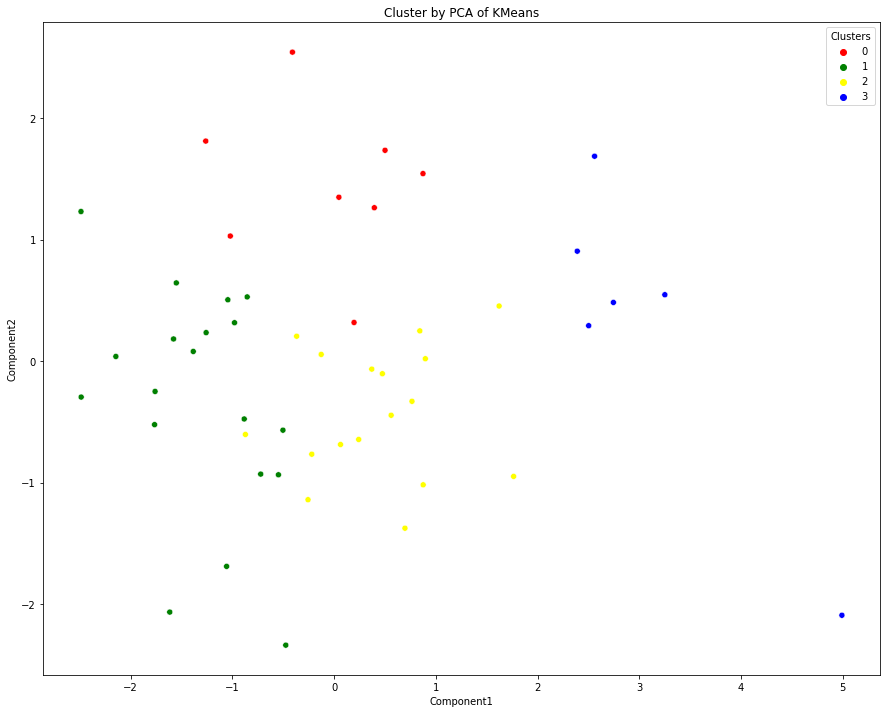

In [226]:
#plot the resultant of above table.
xa=df_concat['Component1']
ya=df_concat['Component2']
plt.figure(figsize=(15,12))
sns.scatterplot(xa,ya,hue=df_concat['Clusters'],palette=['red','green','yellow','blue'])
plt.title('Cluster by PCA of KMeans')
plt.show()

# 6.HC using principal components

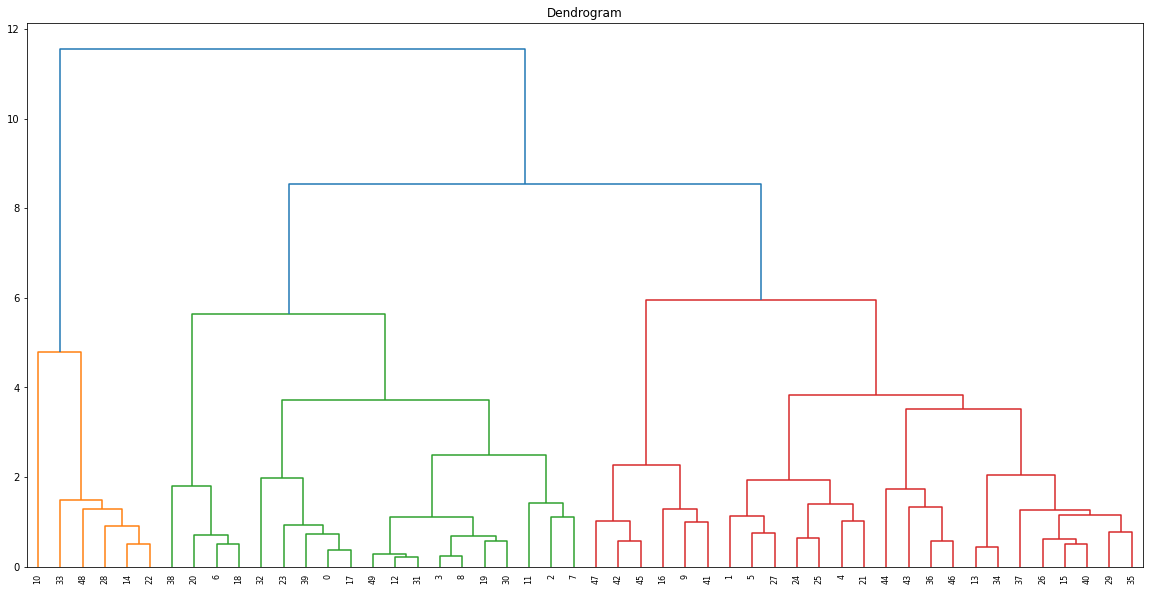

In [227]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram (sch.linkage(model_pca,method = 'ward'))

plt.title('Dendrogram')


plt.show()

In [228]:
hc_pca=AgglomerativeClustering(n_clusters = 4,affinity ='euclidean',linkage ='ward')
clusters_hc_pca=hc.fit_predict(model_pca)

In [229]:
clusters_hc_pca

array([2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

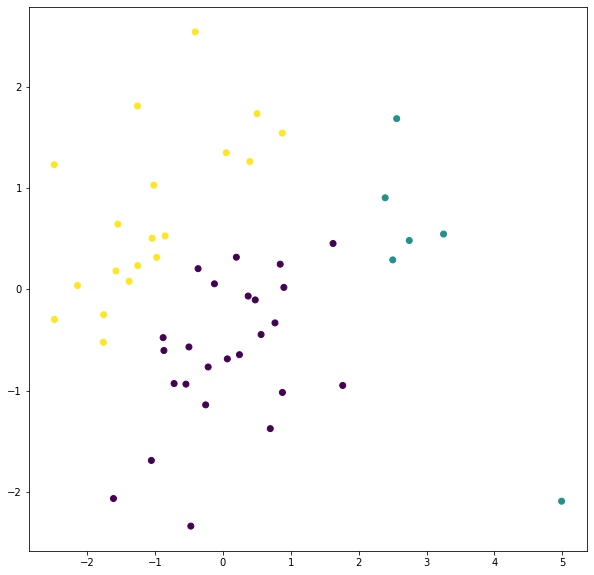

In [230]:
plt.figure(figsize=(10,10))
plt.scatter(model_pca[:,0],model_pca[:,1],c=clusters_hc_pca)

In [231]:
result["clusters_hc_pca"] = clusters_hc_pca
result.head(3)

,County,Murder,Assault,UrbanPop,Rape,Clusters_kmeans,clusters_hc,Clusters_pca_kmeans,clusters_hc_pca
0,Alabama,13.2,236,58,21.2,0,2,1,2
1,Alaska,10.0,263,48,44.5,0,2,2,0
2,Arizona,8.1,294,80,31.0,0,2,0,2
